In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stat
import time

In [2]:
data = pd.read_csv("regr.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
l = data['l'].values
t = data['t'].values
#From simple pendulum equation where L is proportional to T^2
tsq = t * t

In [4]:
data

,l,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568
...,...,...
85,0.95,1.98410
86,0.96,2.00660
87,0.97,2.04930
88,0.98,2.05030


We quickly summarise the essenial parts of the Gradient Descent method:

y=mx+c 

E  = 1/n   ∑ni=1(yi−y)2 

∂E∂m  =  2/n   ∑ni=1−xi(yi−(mxi+c)) 

∂E∂c  =  2/n   ∑ni=1−(yi−(mxi+c))

In [5]:
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_on_all(x, y, m, c, eta, iterations=100):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

TRAIN
Let us visualize the training:
η  = 0.001
Training for 1000 iterations, plotting after every 100 iterations:

In [9]:
# Init m, c
m, c = 10, -10

In [13]:
# Learning rate
lr = 0.01

m = 6.44121 c = -1.24768 Error = 0.369368
m = 6.21644 c = -1.11854 Error = 0.302009
m = 6.01364 c = -1.00203 Error = 0.247173
m = 5.83066 c = -0.896902 Error = 0.202533
m = 5.66557 c = -0.80205 Error = 0.166192
m = 5.51661 c = -0.716469 Error = 0.136607
m = 5.38221 c = -0.639252 Error = 0.112523
m = 5.26094 c = -0.569582 Error = 0.0929167
m = 5.15153 c = -0.506722 Error = 0.0769556
m = 5.05281 c = -0.450005 Error = 0.063962


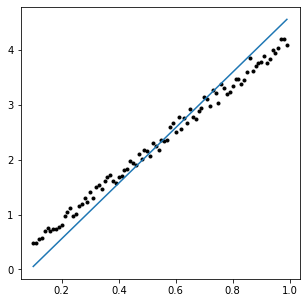

In [15]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

Clearly this is not enough.

Let us train for a 1000 more iterations, with a greater learning rate:

η  = 0.01

In [ ]:
# Learning rate
lr = 0.01

In [ ]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

In [ ]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

This seems correct.

Comparison with standard library
Let us compare the values we found with the values found by the standard scipy library function "stats":

In [9]:
print("From our Gradient Descent   m = {0:.06} c = {1:.06}".format(m, c))

msp, csp, _, _, _ = stat.linregress(l,tsq)
print("From scipy.stats.linregress m = {0:.06} c = {1:.06}".format(msp, csp))

From our Gradient Descent   m = 4.14138 c = 0.073638
From scipy.stats.linregress m = 4.14148 c = 0.0735804


Close enough!

Plotting error vs iterations
So far we have seen how the Gradient Descent works by looking at the fit of the regression line. Let us change perspectives and plot the error at various stages. This just shows that the process is converging and gives us a feel for the rate at which it is converging.

E=1n∑ni=1(yi−y)2 

=1n∑ni=1(yi−mxi−c)2

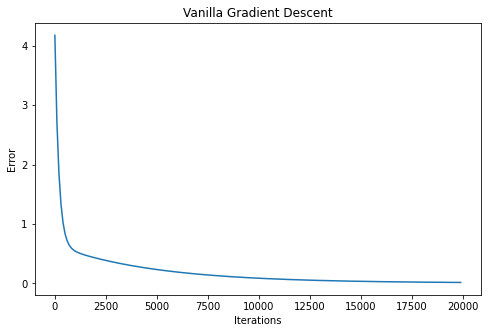

In [10]:
ms, cs,errs = [], [], []
m, c = 0, 0
eta = 0.001
for times in range(200):
    m, c, error = train_on_all(l, tsq, m, c, eta, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 20000,100)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent")
plt.show()

We see that the error at saturation is around 0.01.

Error vs m, c

Let us visualize the error as a function of m and c

In [11]:
def error(x,y,m,c):
    ycalc = m * x + c
    error = sum((y - ycalc)**2) / len(y)
    return error

(400, 400) (400, 400) (400, 400)


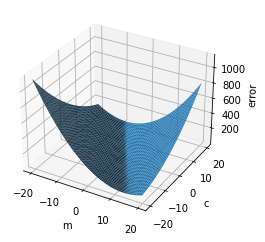

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ms1 = np.arange(-20, 20, 0.1)
cs1 = np.arange(-20, 20, 0.1)
X, Y = np.meshgrid(ms1, cs1)
err = []
for i in range(len(ms1)):
    for j in range(len(cs1)):
        err.append(error(l,tsq,ms1[i],cs1[j]))
err = np.array(err)
Z = np.reshape(err,(-1,len(ms1)))
print(X.shape, Y.shape, Z.shape)
ax.plot_surface(X, Y, Z) 
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('error')
plt.show()